In [1]:
import tensorflow as tf

In [2]:
tf.__version__

'2.0.0'

In [3]:
from tensorflow import keras

In [4]:
keras.__version__

'2.2.4-tf'

## Loading the fashion MNIST dataset from Keras 

In [5]:
fashion_mnist = keras.datasets.fashion_mnist

# Forming training and test sets
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 1s 0us/step


In [21]:
X_train_full.shape

(60000, 28, 28)

In [22]:
X_test.shape

(10000, 28, 28)

In [23]:
# Breaking the training set further into validation sets
from sklearn.model_selection import train_test_split

X_train, X_validation, y_train, y_validation = train_test_split(X_train_full, y_train_full, test_size=0.1)

In [24]:
X_train.shape, X_validation.shape

((54000, 28, 28), (6000, 28, 28))

In [25]:
# We are here normalising the X values
# The training images are grayscale images who have values between 0 and 255. So we are normalising them here.

X_train = X_train/255.0
X_validation = X_validation/255.0

In [27]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
                   "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

# There are the names of the different clothing items in the dataset

## Creating the model 

In [32]:
# Creating a custom model 
# models.Sequential allows use to define the layers of the neural network and the number of nodes (units) in them

model = keras.models.Sequential([
    # The first layer is the same as the number of pixels in the image. 28 x 28.
    # Flatten will create it into a single layer of 784
    keras.layers.Flatten(input_shape=[28,28]),
    # These are the number of nodes in the hidden layer with the activation function as ReLu
    keras.layers.Dense(units=512, activation="relu"),
    # These are the number of nodes in the hidden layer with the activation function as ReLu
    keras.layers.Dense(units=258, activation="relu"),
    # The output layer will have the same shape as the distint classes
    keras.layers.Dense(units=len(class_names), activation="softmax")
])

In [33]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 512)               401920    
_________________________________________________________________
dense_1 (Dense)              (None, 258)               132354    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                2590      
Total params: 536,864
Trainable params: 536,864
Non-trainable params: 0
_________________________________________________________________


In [34]:
# The reason why dense has 401920 Parameters is because (input_layer = 784) * (it's own nodes = 512) + (bias = 512)

In [35]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

#loss functionis sparse_categorical_crossentropy because the output value is multiclass and mutually exclusive.


In [36]:
history = model.fit(X_train, y_train, epochs=30, validation_data=(X_validation, y_validation))

Train on 54000 samples, validate on 6000 samples
Epoch 1/30
54000/54000 [==============================] - 5s 102us/sample - loss: 0.6965 - accuracy: 0.7715 - val_loss: 0.5085 - val_accuracy: 0.8312
Epoch 2/30
54000/54000 [==============================] - 5s 96us/sample - loss: 0.4812 - accuracy: 0.8325 - val_loss: 0.4492 - val_accuracy: 0.8417
Epoch 3/30
54000/54000 [==============================] - 6s 104us/sample - loss: 0.4375 - accuracy: 0.8460 - val_loss: 0.5465 - val_accuracy: 0.7893
Epoch 4/30
54000/54000 [==============================] - 5s 101us/sample - loss: 0.4117 - accuracy: 0.8547 - val_loss: 0.3962 - val_accuracy: 0.8660
Epoch 5/30
54000/54000 [==============================] - 6s 104us/sample - loss: 0.3903 - accuracy: 0.8620 - val_loss: 0.4475 - val_accuracy: 0.8443
Epoch 6/30
54000/54000 [==============================] - 6s 102us/sample - loss: 0.3746 - accuracy: 0.8674 - val_loss: 0.3718 - val_accuracy: 0.8707
Epoch 7/30
54000/54000 [============================

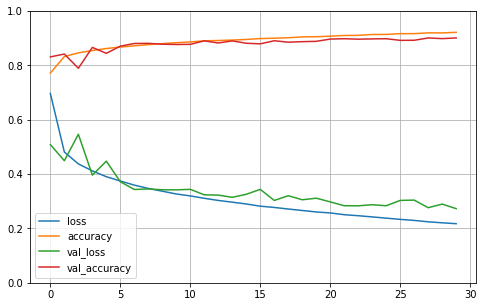

In [39]:
import pandas as pd
import matplotlib.pyplot as plt

pd.DataFrame(history.history).plot(figsize=(8, 5)) 
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1] 
plt.show()

In [41]:
loss, accuracy = model.evaluate(X_test, y_test)

10000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

In [42]:
accuracy

0.8506

In [43]:
# Accuracy of the model for the given hyperparameters was 85.06 %
# You can downlaod and notebook, change the parameters and check if you can improve the accruacy
# Try changing the number of units in the hidden layers. The number of hidden layers. Activation functions. etc

## Saving the model

In [44]:
model.save("models/my_first_model")

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
INFO:tensorflow:Assets written to: models/my_first_model/assets


## Loading the model 

In [45]:
same_model = tf.keras.models.load_model("models/my_first_model")

In [59]:
same_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 512)               401920    
_________________________________________________________________
dense_1 (Dense)              (None, 258)               132354    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                2590      
Total params: 536,864
Trainable params: 536,864
Non-trainable params: 0
_________________________________________________________________


In [75]:
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [76]:
import numpy as np
y_pred = model.predict_classes(X_new)
y_pred
np.array(class_names)[y_pred] # This is what we hav predicted

array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')

In [77]:
np.array(class_names)[y_test[:3]] # As you can see, the values are an exact match.

array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')

### This is my first time coding a ANN using Tensorflow. Hope I get better with time. Cheers !

In [108]:
X_custom_number = X_test[50][np.newaxis, :, :]
y_proba = model.predict(X_custom_number)
y_proba.round(2)

array([[0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

In [109]:
np.array(class_names)[model.predict_classes(X_custom_number)]


array(['Coat'], dtype='<U11')

In [110]:
np.array(class_names)[y_test[50]]

'Coat'

In [111]:
# You can add can 50 to a custom number and see if the model predicts it corrects or not.